In [49]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
gdp_file = 'gdp_per_capita.csv'
bli_file = 'oecd_bli_2015.csv'


In [35]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [40]:
bli = pd.read_csv(bli_file, thousands=',')
print(bli)
gdp = pd.read_csv(gdp_file, thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')
gdp

     LOCATION         Country INDICATOR  \
0         AUS       Australia   HO_BASE   
1         AUT         Austria   HO_BASE   
2         BEL         Belgium   HO_BASE   
3         CAN          Canada   HO_BASE   
4         CZE  Czech Republic   HO_BASE   
...       ...             ...       ...   
3287      EST         Estonia   WL_TNOW   
3288      ISR          Israel   WL_TNOW   
3289      RUS          Russia   WL_TNOW   
3290      SVN        Slovenia   WL_TNOW   
3291     OECD    OECD - Total   WL_TNOW   

                                      Indicator MEASURE Measure INEQUALITY  \
0            Dwellings without basic facilities       L   Value        TOT   
1            Dwellings without basic facilities       L   Value        TOT   
2            Dwellings without basic facilities       L   Value        TOT   
3            Dwellings without basic facilities       L   Value        TOT   
4            Dwellings without basic facilities       L   Value        TOT   
...            

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
...,...,...,...,...,...,...,...
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1064.350,2012.0


In [41]:
country_stats = prepare_country_stats(bli,gdp)
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]
print(X)
print(y)
country_stats

[[ 9054.914]
 [ 9437.372]
 [12239.894]
 [12495.334]
 [15991.736]
 [17288.083]
 [18064.288]
 [19121.592]
 [20732.482]
 [25864.721]
 [27195.197]
 [29866.581]
 [32485.545]
 [35343.336]
 [37044.891]
 [37675.006]
 [40106.632]
 [40996.511]
 [41973.988]
 [43331.961]
 [43603.115]
 [43724.031]
 [43770.688]
 [49866.266]
 [50854.583]
 [50961.865]
 [51350.744]
 [52114.165]
 [55805.204]]
[[6. ]
 [5.6]
 [4.9]
 [5.8]
 [6.1]
 [5.6]
 [4.8]
 [5.1]
 [5.7]
 [6.5]
 [5.8]
 [6. ]
 [5.9]
 [7.4]
 [7.3]
 [6.5]
 [6.9]
 [7. ]
 [7.4]
 [7.3]
 [7.3]
 [6.9]
 [6.8]
 [7.2]
 [7.5]
 [7.3]
 [7. ]
 [7.5]
 [7.2]]


,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


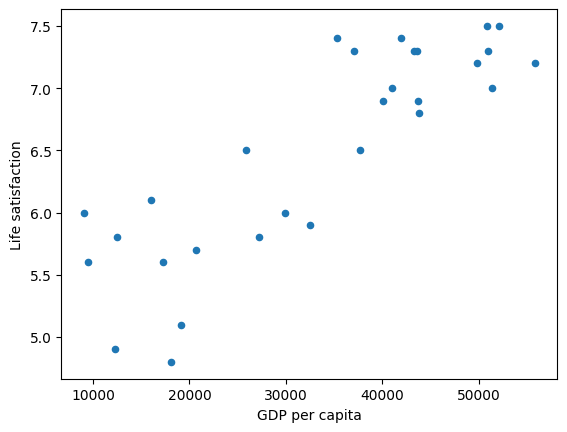

In [45]:
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()


In [50]:
lin_reg_model = LinearRegression()


In [51]:
lin_reg_model.fit(X,y)

LinearRegression()

In [53]:
X_new = [[2053]]
print(lin_reg_model.predict(X_new))

[[4.95388681]]
